### Detect overlapping between two ellipses
Last verified to run: 27 Oct 2021

In [1]:
import numpy as np
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.patches import Ellipse

#### The Ellipse Equation: (https://en.wikipedia.org/wiki/Ellipse#General_ellipse , but swapping B and C)

$$
A x^2 + B y^2 + C x y +  D x +  E y + F = 0
$$
where 

$
\begin{align}
A & = a^2\sin^2{\theta} +  b^2\cos^2{\theta},  \\
B & = a^2\cos^2{\theta} +  b^2\sin^2{\theta}, \\
C & = 2(b^2 - a^2)\sin{\theta}\cos{\theta}, \\
D & = -2Ax_0 - Cy_0,  \\
E & = -C x_0 - 2B y_0,  \\
F & = Ax_0^2 + C x_0 y_0 + By_0^2 - a^2 b^2. 
\end{align}
$

$x_0, y_0$ are the coordinates for the ellipse center, $a$, $b$ the semi-major/minor axis and $\theta$ the position angle (the angle between the major axis and ra for the extragalactic catalog, and between the major axis and CCD x axis for the object catalog).

#### following the definitions of https://www.sciencedirect.com/science/article/abs/pii/S0167839617300791 (hereafter AC2017):  
shrink the parameters CDE by half,

$$ C = C / 2, \quad D = D / 2, \quad E = E / 2, $$

and modify the Ellipse Equation:

$$
A x^2 + B y^2 + 2C x y + 2 D x + 2 E y + F = 0.
$$

In [2]:
def ellipse_equation(x, y, A, B, C, D, E, F):
    return A*x**2 + B*y**2 + 2*C*x*y + 2*D*x + 2*E*y + F

def ab2AB(a, b, theta, x0, y0):
    ### a, b, in any length units; theta in degrees ###
    sin = np.sin(np.radians(theta))
    cos = np.cos(np.radians(theta))
    
    A = (a*sin)**2 + (b*cos)**2
    B = (a*cos)**2 + (b*sin)**2
    C = 2*(b**2 - a**2)*sin*cos
    D = -2*A*x0 - C*y0
    E = -C*x0 - 2*B*y0
    F = A*x0**2 + C*x0*y0 + B*y0**2 - (a*b)**2
    C, D, E = C/2, D/2, E/2
    
    return [A, B, C, D, E, F]

#### The function is_overlapping provides a linear algorithm to detect overlapping ellipses, following AC2017.

In [3]:
def is_overlapping(p1, p2):
    A1, B1, C1, D1, E1, F1 = p1
    A2, B2, C2, D2, E2, F2 = p2
    
    M1 = [[A1, C1, D1], [C1, B1, E1], [D1, E1, F1]]
    M2 = [[A2, C2, D2], [C2, B2, E2], [D2, E2, F2]]
    
    l0 = np.linalg.det(M2)
    l1 = (np.linalg.det([[A1,C2,D2],[C1,B2,E2],[D1,E2,F2]]) +
            np.linalg.det([[A2,C1,D2],[C2,B1,E2],[D2,E1,F2]]) +
            np.linalg.det([[A2,C2,D1],[C2,B2,E1],[D2,E2,F1]])) / 3
    l2 = (np.linalg.det([[A2,C1,D1],[C2,B1,E1],[D2,E1,F1]]) +
            np.linalg.det([[A1,C2,D1],[C1,B2,E1],[D1,E2,F1]]) +
            np.linalg.det([[A1,C1,D2],[C1,B1,E2],[D1,E1,F2]])) / 3
    l3 = np.linalg.det(M1)

    delta1 = np.linalg.det([[l3, l2],[l2, l1]])
    delta2 = np.linalg.det([[l3, l1],[l2, l0]])
    delta3 = np.linalg.det([[l2, l1],[l1, l0]])
    discriminant_P = np.linalg.det([[2*delta1, delta2], [delta2, 2*delta3]])
    
    if (discriminant_P >=0) and ((l1>0) or (l2>0)):
        return False  ## not over-lapping
    else:
        return True

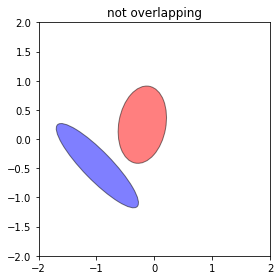

In [13]:
x1, y1 = np.random.uniform(-1,1,2)  ## center of ellipse 1
a1, b1 = np.random.uniform(0,1,2)
theta1 = np.random.uniform(0, 180)  ## in degrees
if b1 > a1:
    a1, b1 = b1, a1

x2, y2 = np.random.uniform(-1,1,2)  ## center of ellipse 2
a2, b2 = np.random.uniform(0,1,2)
theta2 = np.random.uniform(0, 180)  ## in degrees
if b2 > a2:
    a2, b2 = b2, a2

p1 = ab2AB(a1, b1, theta1, x1, y1)
p2 = ab2AB(a2, b2, theta2, x2, y2)

fig = plt.figure(figsize=(4,4))
ax1 = fig.add_subplot(111, xlim=(-2,2), ylim=(-2,2))

ellipse1 = Ellipse((x1,y1), width=2*a1, height=2*b1, angle=theta1, facecolor='r', edgecolor='k', alpha=0.5, linewidth=1)
ellipse2 = Ellipse((x2,y2), width=2*a2, height=2*b2, angle=theta2, facecolor='b', edgecolor='k', alpha=0.5, linewidth=1)
ax1.add_artist(ellipse1)
ax1.add_artist(ellipse2)

if is_overlapping(p1, p2):
    ax1.set_title('ellipses overlapping')
else:
    ax1.set_title('not overlapping')

plt.tight_layout()